### Importing some useful modules

In [1]:
%%time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

Wall time: 2.63 s


#### Reading CSV File

In [2]:
auto = pd.read_csv("AutoData.csv")
print("Dataset with rows {} and columns {}".format(auto.shape[0],auto.shape[1]))
auto.head()

Dataset with rows 205 and columns 25


,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
auto.info() # so in this datasets we have 8 float data types, 7 interger data types and 10 object type data.
# to check if there is any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [7]:
auto.isnull().sum(axis=0) # so it's comparebly very clean data with no null values. 
# Now we will move to EDA part of the datasets.

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### EDA(Exploratory Data Analysis)

In [8]:
auto.head() # so considering all the features we have to predict the price.

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
%%time
# here we are seperating object and numerical data types 
obj_col = []
num_col = []
for col in auto.columns:
    if auto[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

Wall time: 995 µs


In [5]:
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)


Object data type features  ['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Numerical data type features  ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


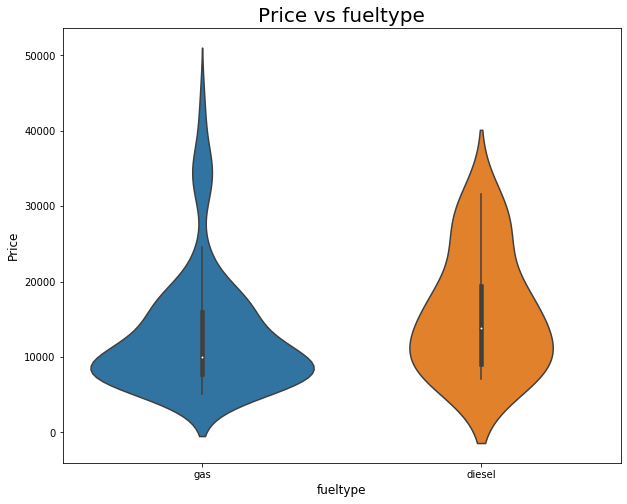

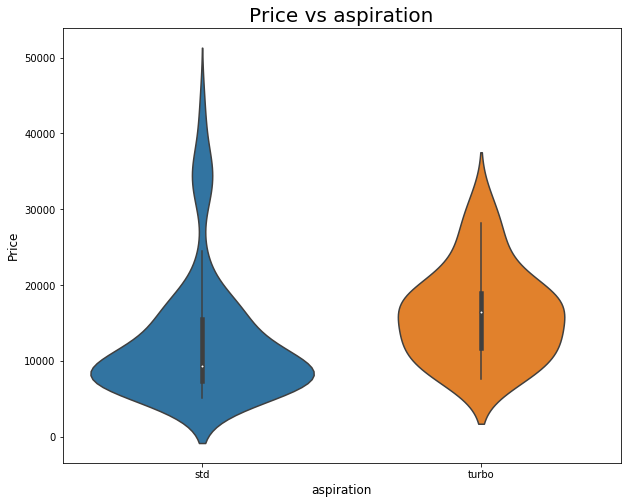

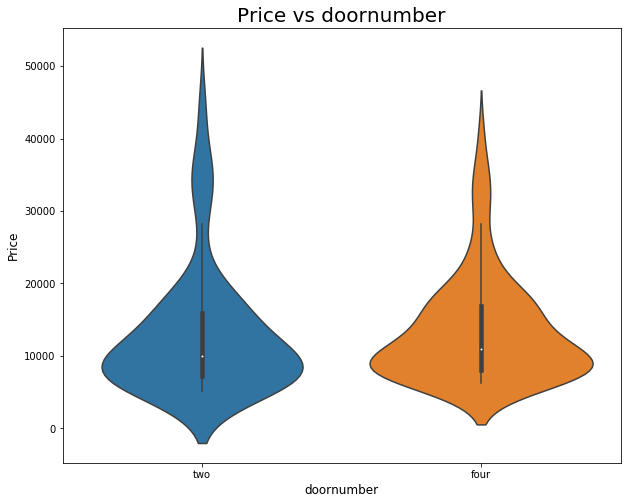

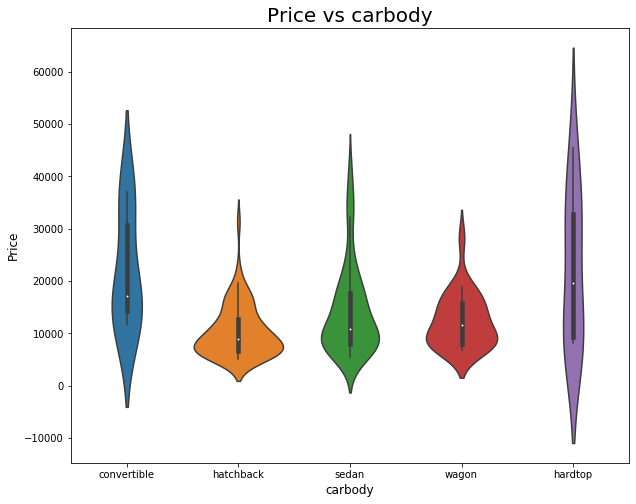

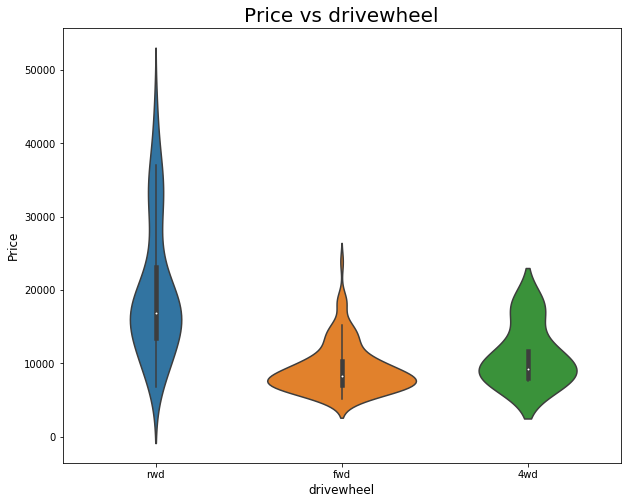

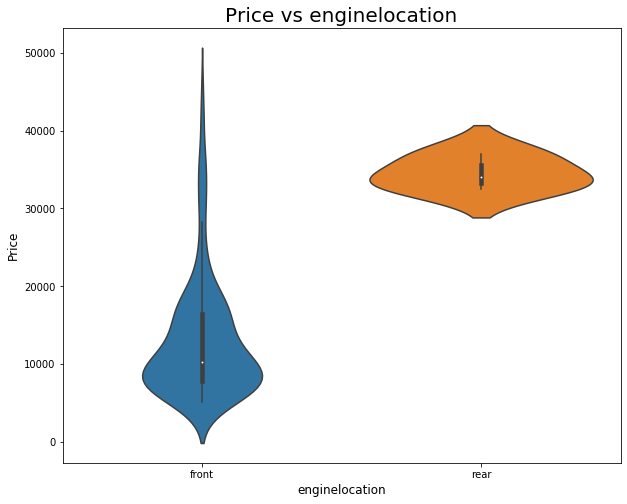

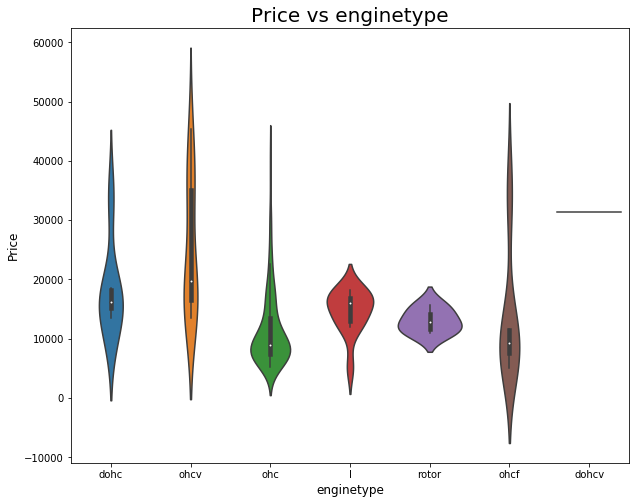

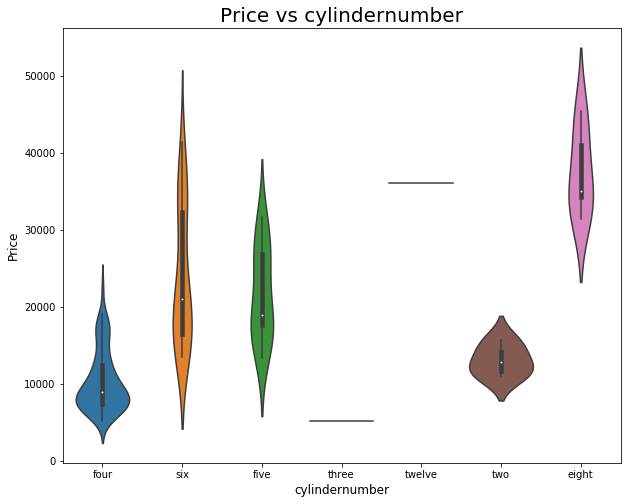

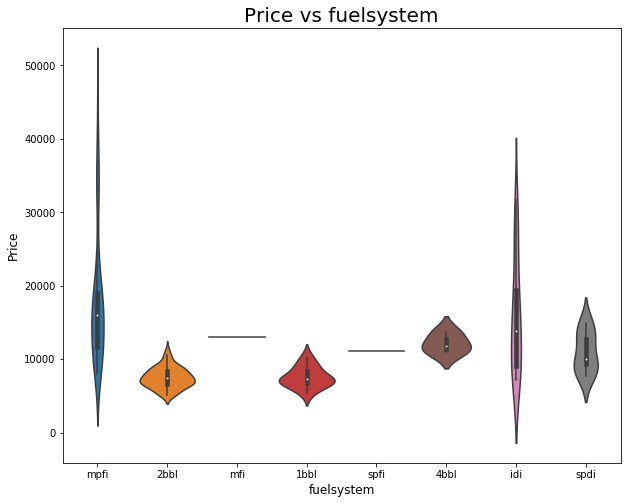

In [17]:
from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(10,8))
    sns.violinplot(auto[col],auto["price"])
    plt.title("Price vs "+col,fontsize=20)
    plt.xlabel(col,fontsize=12)
    plt.ylabel("Price",fontsize=12)
    plt.show()
#sns.despine()
# violin plots give best of both worlds 
# it gives boxplot and distribution of data like whether the data is skewed or not.
# if normally distributed then it's the best you can get.
# you can also use barplots in this case.

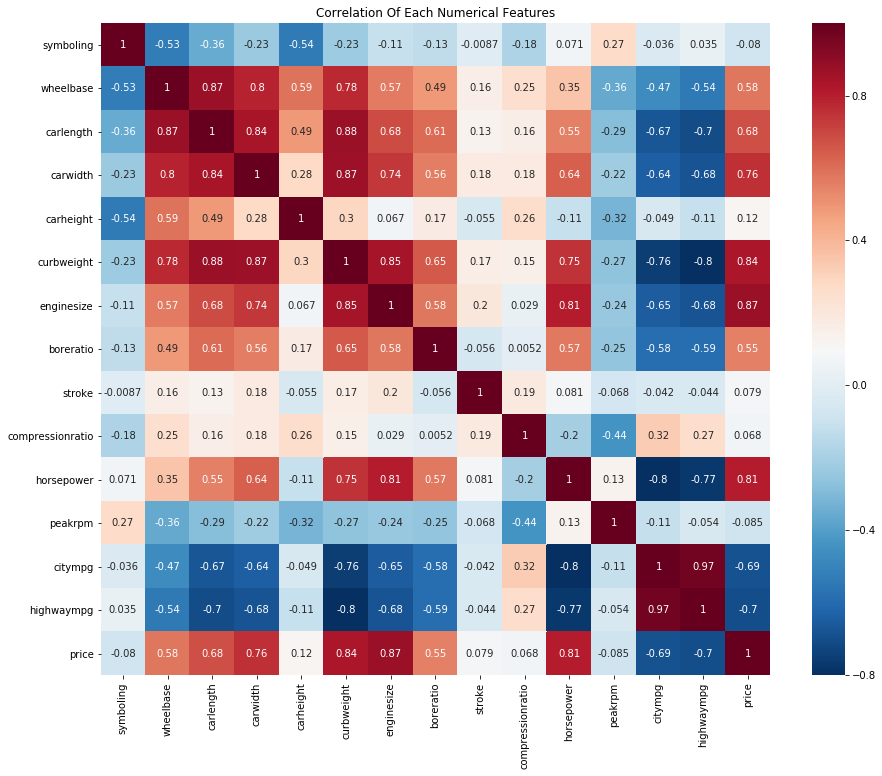

In [8]:
plt.figure(figsize=(15,12))
sns.heatmap(auto.corr(),annot=True,cmap='RdBu_r')
plt.title("Correlation Of Each Numerical Features")
plt.show()

1. There is certain group of features which is highly correlated i.e multicollinearity exist.
2. One cluster having high correlation between them is wheelbase,carlength,carwidth if you think mathematically the base is nothing but lenth*width.
3. Second Cluster having high correlation between them is enginesize,horsepower,curbweightand citympg(miles per gallon) if you think as enginesize increases horsepower also increases.And if engine is large enough then it's automatically goinf to increase the total mass of body.


<Figure size 720x576 with 0 Axes>

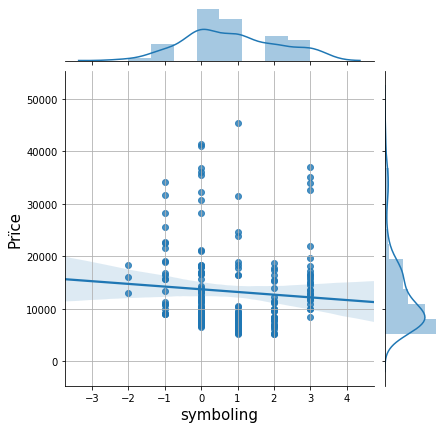

<Figure size 720x576 with 0 Axes>

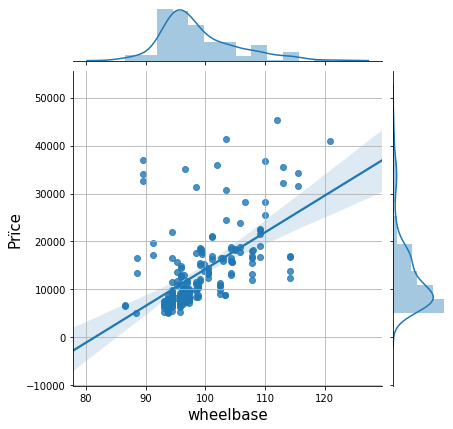

<Figure size 720x576 with 0 Axes>

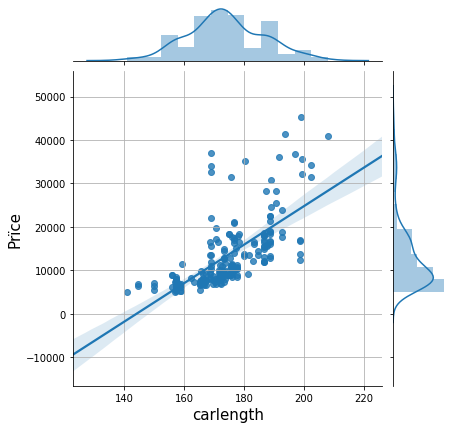

<Figure size 720x576 with 0 Axes>

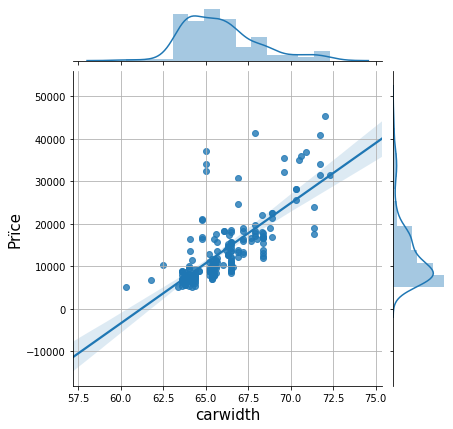

<Figure size 720x576 with 0 Axes>

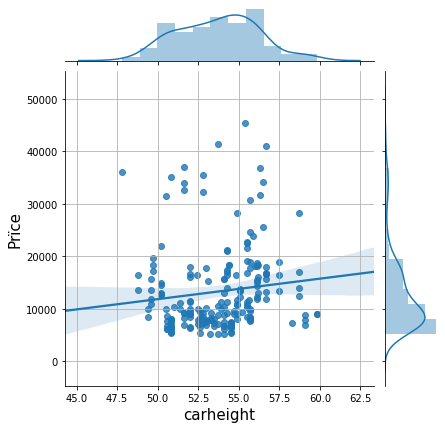

<Figure size 720x576 with 0 Axes>

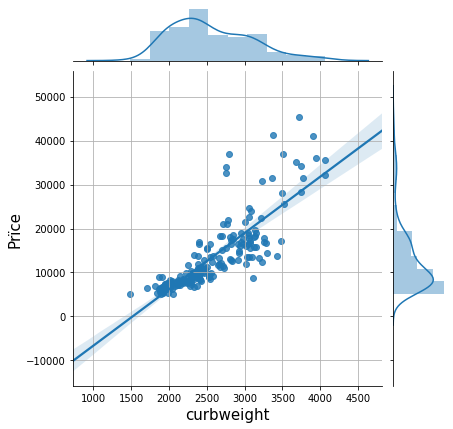

<Figure size 720x576 with 0 Axes>

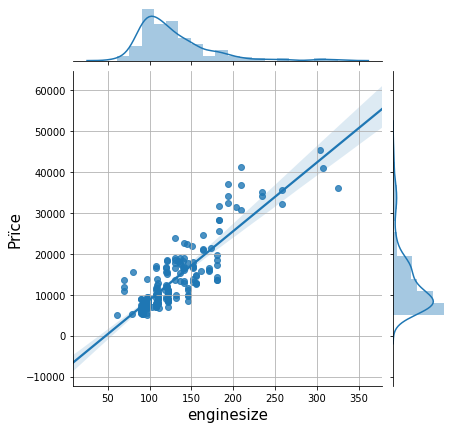

<Figure size 720x576 with 0 Axes>

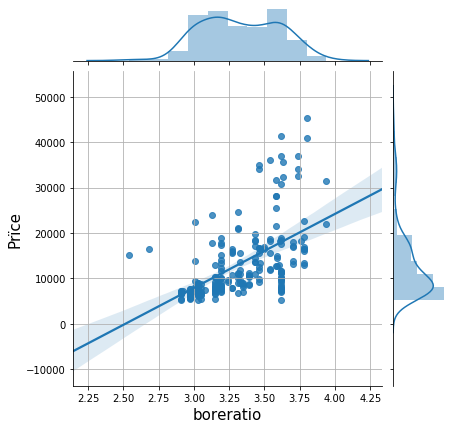

<Figure size 720x576 with 0 Axes>

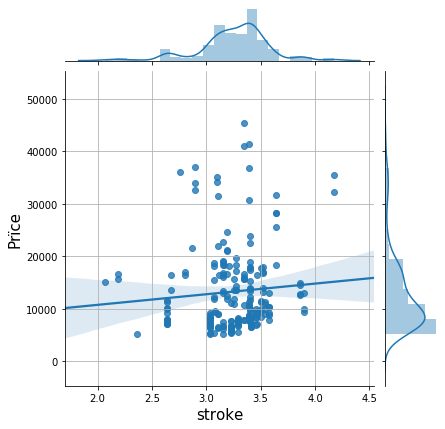

<Figure size 720x576 with 0 Axes>

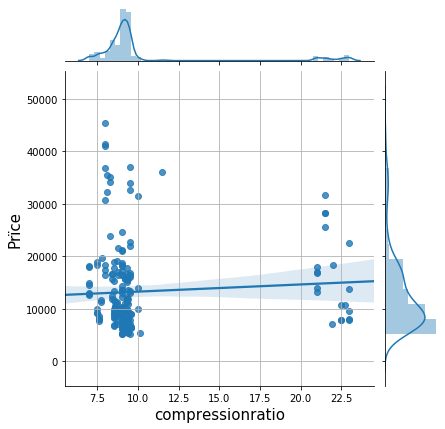

<Figure size 720x576 with 0 Axes>

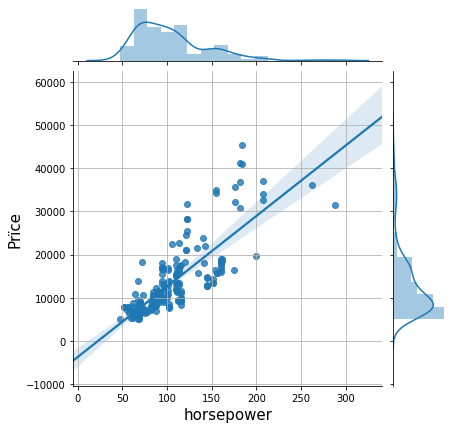

<Figure size 720x576 with 0 Axes>

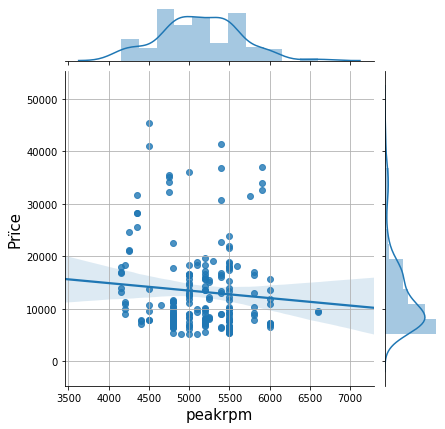

<Figure size 720x576 with 0 Axes>

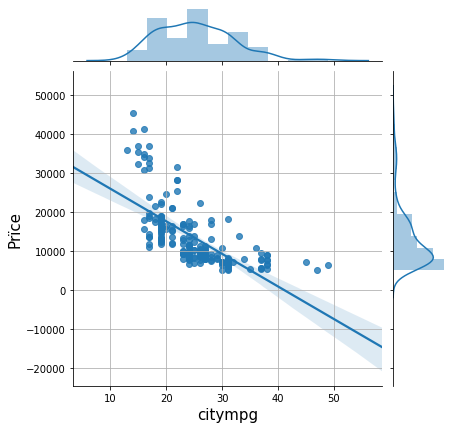

<Figure size 720x576 with 0 Axes>

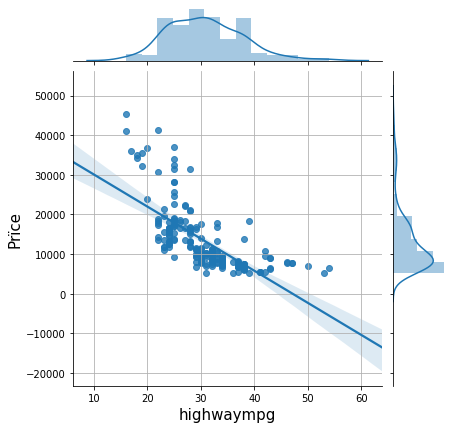

In [183]:
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = auto[col],y = auto["price"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Prïce",fontsize = 15)
    plt.grid()
    plt.show()

####  From above we can see only using one features i.e enginesize we can get r2_score of 0.80. This features we will be using in coming models.

In [120]:
temp=dict()
for col in (int_col[1:] + float_col[:-1]):
    temp[col] = [pearsonr(auto["price"],auto[col])[0],spearmanr(auto["price"],auto[col])[0]]

In [121]:
temp = pd.DataFrame(temp)
temp.index=["Pearson Correlation","Spearman Correlation"]
temp

,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio
Pearson Correlation,0.835305,0.874145,0.808139,-0.085267,-0.685751,-0.697599,0.577816,0.682920,0.759325,0.119336,0.553173,0.079443,0.067984
Spearman Correlation,0.909067,0.825996,0.854610,-0.066281,-0.829479,-0.822729,0.681773,0.804316,0.811401,0.242769,0.643772,0.111343,-0.173646


1. https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php to get some insights of how spearman rank correlation works and is different from pearson correlation.
2. One major disadvantage of pearson correlation is that it's very sensitive to outlier's points which rank correlation overcome it.

### Split the dataset using 80:20 ratio

In [291]:
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts = train_test_split(auto.drop(["price"],axis=1),auto["price"],test_size = 0.2,random_state=42)
print("Train Data shape ",X_tr.shape)
#X_tr.head()
print("Test Data shape ",X_ts.shape)
#X_ts.head()

Train Data shape  (164, 24)
Test Data shape  (41, 24)


### One Hot Encoding of Categorical Features

In [292]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False,handle_unknown="ignore")
X_tr_obj = ohe.fit_transform(X_tr[obj_col])
X_ts_obj = ohe.transform(X_ts[obj_col])
print(X_tr_obj.shape)
print(X_ts_obj.shape)

(164, 161)
(41, 161)


In [293]:
features = ohe.get_feature_names().tolist()

In [294]:
X_tr_obj = pd.DataFrame(X_tr_obj,columns= features)
X_ts_obj = pd.DataFrame(X_ts_obj,columns= features)

In [296]:
auto["make"].value_counts()

peugeot 504           6
toyota corona         6
toyota corolla        6
subaru dl             4
honda civic           3
                     ..
nissan titan          1
dodge dart custom     1
mazda glc custom l    1
nissan teana          1
nissan note           1
Name: make, Length: 147, dtype: int64

In [295]:
X_tr_obj["x0_Nissan versa"]

,x0_Nissan versa,x0_alfa-romero Quadrifoglio,x0_alfa-romero giulia,x0_alfa-romero stelvio,x0_audi 100 ls,x0_audi 100ls,x0_audi 4000,x0_audi 5000,x0_audi fox,x0_bmw 320i,...,x8_twelve,x8_two,x9_1bbl,x9_2bbl,x9_4bbl,x9_idi,x9_mfi,x9_mpfi,x9_spdi,x9_spfi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Min-Max Scaling of Numerical Features

In [299]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_tr = min_max.fit_transform(X_tr[num_col[:-1]])
X_ts = min_max.transform(X_ts[num_col[:-1]])
print(X_tr.shape)
print(X_ts.shape)

(164, 14)
(41, 14)


In [300]:
X_tr = pd.DataFrame(X_tr,columns=num_col[:-1])
X_ts = pd.DataFrame(X_ts,columns=num_col[:-1])

In [301]:
X_tr = pd.concat([X_tr_obj,X_tr[num_col[:-1]]],axis=1)
X_ts = pd.concat([X_ts_obj,X_ts[num_col[:-1]]],axis=1)
print(X_tr.shape)
print(X_ts.shape)

(164, 175)
(41, 175)


In [302]:
X_tr.head()

,x0_Nissan versa,x0_alfa-romero Quadrifoglio,x0_alfa-romero giulia,x0_alfa-romero stelvio,x0_audi 100 ls,x0_audi 100ls,x0_audi 4000,x0_audi 5000,x0_audi fox,x0_bmw 320i,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.550000,0.392078,0.250000,0.635714,0.747619,0.9375,0.084746,0.020408,0.5625,0.676471
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.741667,0.558968,0.195312,0.657143,0.057143,0.0875,0.182203,0.346939,0.1875,0.235294
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.941667,0.205162,0.085938,0.364286,0.457143,0.1250,0.042373,0.265306,0.5625,0.617647
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.558333,0.067646,0.105469,0.435714,0.580952,0.1500,0.072034,0.428571,0.5625,0.617647
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.458333,0.209168,0.156250,0.435714,0.719048,0.1250,0.144068,0.673469,0.4375,0.500000


### Linear Regression

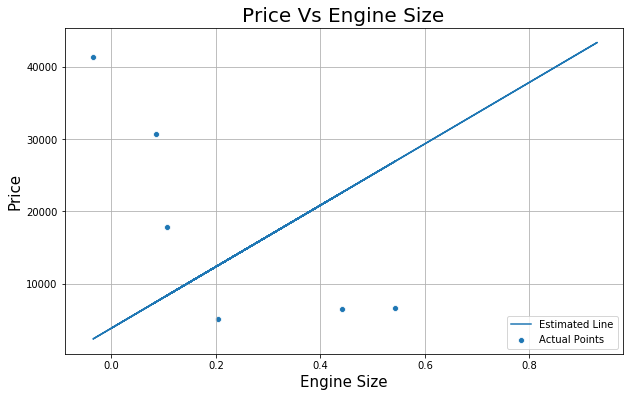

R2 Score using engine size features is --> 0.8040958796678975


In [283]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score

# calculation part
model = LinearRegression()
model.fit(np.array(X_tr["enginesize"]).reshape(-1,1),np.array(y_tr).reshape(-1,1))
y_pred = model.predict(np.array(X_ts["enginesize"]).reshape(-1,1))


# plotting part
plt.figure(figsize=(10,6))
sns.scatterplot(x = X_ts["enginesize"],y = y_ts,label = "Actual Points",palette="set1")
plt.plot(X_ts["enginesize"],y_pred,label = "Estimated Line")
plt.title("Price Vs Engine Size",fontsize=20)
plt.xlabel("Engine Size",fontsize = 15)
plt.ylabel("Price",fontsize = 15)
plt.legend()
plt.grid()
plt.show()
print("R2 Score using engine size features is -->",r2_score(y_ts,y_pred))

1. So from above eda and visualizations we are aware that enginesize is the most important numerical features which contribute more in predicting the target values.
2. So we have used only engine size features to predict the r2 score which is 0.804

## Multiple Regression Models

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import RFE

## Result Based On RFE(Reverse Features Selection)

#### Categorical Features

In [303]:
#selecting top 10 features 
lr = LinearRegression(n_jobs=-1)
rfe = RFE(estimator=lr,n_features_to_select=10)
rfe.fit(X_tr,y_tr)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [304]:
selected_feat = X_tr.columns[rfe.ranking_==1]

In [305]:
selected_feat

Index(['x6_front', 'x6_rear', 'x7_dohc', 'x7_dohcv', 'x7_l', 'x7_ohc',
       'x7_ohcf', 'x8_eight', 'x8_four', 'x8_twelve'],
      dtype='object')

In [237]:
X_tr_cat = sm.add_constant(X_tr[selected_feat]) # adding constant 

In [238]:
pd.Series([variance_inflation_factor(X_tr_cat.values, i) 
               for i in range(X_tr_cat.shape[1])], 
              index=X_tr_cat.columns)
# Variance inflation factor
1/(1-1)

const        0.000000
x6_front          inf
x6_rear           inf
x7_dohc      2.377197
x7_dohcv     1.325203
x7_l         2.865196
x7_ohc       6.211966
x7_ohcf      3.215044
x8_eight     1.734417
x8_four      2.080068
x8_twelve    1.104336
dtype: float64

In [246]:
model = sm.OLS(np.array(y_tr),X_tr_cat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     42.73
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           1.62e-37
Time:                        12:42:33   Log-Likelihood:                -1598.2
No. Observations:                 164   AIC:                             3216.
Df Residuals:                     154   BIC:                             3247.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.539e+04   1406.158     10.947      0.000    1.26e+04    1.82e+04
x6_front     254.4900   1142.237      0.223      0.824   -2001.986    2510.966
x6_rear     1.514e+04   2132.193      7.100      0.000    1.09e+04    1.94e+04
x7_dohc     8314.5476   1970.125      4.220      0.000    4422.589    1.22e+04
x7_dohcv   -6812.8333   4920.635     -1.385      0.168   -1.65e+04    2907.822
x7_l        1.153e+04   2251.691      5.122      0.000    7084.941     1.6e+04
x7_ohc      6062.8629   1822.798      3.326      0.001    2461.947    9663.779
x7_ohcf     3995.9146   2385.202      1.675      0.096    -716.023    8707.852
x8_eight    2.257e+04   2840.930      7.943      0.000     1.7e+04    2.82e+04
x8_four    -1.169e+04   1183.863     -9.876      0.000    -1.4e+04   -9353.111
x8_twelve   2.035e+04   4491.905      4.531      0.000    1.15e+04    2.92e+04
==============================================================================
Omnibus:                       30.369   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.959
Skew:                           1.060   Prob(JB):                     7.74e-10
Kurtosis:                       4.281   Cond. No.                     2.91e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.23e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [264]:
X_tr_obj = X_tr_obj[["x6_rear","x7_dohc","x7_l","x7_ohc","x8_eight","x8_twelve","x8_four"]]

#### Numerical Features

In [313]:
lr = LinearRegression(n_jobs=-1)
rfe = RFE(estimator=lr,n_features_to_select=5)
rfe.fit(X_tr[num_col[:-1]],y_tr)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [314]:
selected_feat = X_tr[num_col[:-1]].columns[rfe.ranking_==1]

In [315]:
selected_feat

Index(['carwidth', 'enginesize', 'stroke', 'peakrpm', 'citympg'], dtype='object')

In [317]:
X_tr_num = sm.add_constant(X_tr[selected_feat])

In [318]:
pd.Series([variance_inflation_factor(X_tr_num.values, i) 
               for i in range(X_tr_num.shape[1])], 
              index=X_tr_num.columns)

const         51.727731
carwidth       2.281392
enginesize     2.602096
stroke         1.061165
peakrpm        1.260072
citympg        2.333303
dtype: float64

In [319]:
model = sm.OLS(np.array(y_tr),X_tr_num).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     156.5
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           2.60e-59
Time:                        21:03:18   Log-Likelihood:                -1554.5
No. Observations:                 164   AIC:                             3121.
Df Residuals:                     158   BIC:                             3140.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4918.1336   1811.128      2.716      0.007    1340.990    8495.277
carwidth    9712.0180   1886.509      5.148      0.000    5985.989    1.34e+04
enginesize  3.311e+04   2577.475     12.846      0.000     2.8e+04    3.82e+04
stroke     -6043.3348   1718.884     -3.516      0.001   -9438.289   -2648.381
peakrpm     5176.8697   1406.674      3.680      0.000    2398.559    7955.181
citympg    -3962.6859   2002.718     -1.979      0.050   -7918.239      -7.133
==============================================================================
Omnibus:                       17.992   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.463
Skew:                           0.558   Prob(JB):                     2.43e-07
Kurtosis:                       4.792   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [320]:
X_tr_main = pd.concat([X_tr_obj,X_tr_num],axis=1)
X_tr_main.head()

,x0_Nissan versa,x0_alfa-romero Quadrifoglio,x0_alfa-romero giulia,x0_alfa-romero stelvio,x0_audi 100 ls,x0_audi 100ls,x0_audi 4000,x0_audi 5000,x0_audi fox,x0_bmw 320i,...,x9_mfi,x9_mpfi,x9_spdi,x9_spfi,const,carwidth,enginesize,stroke,peakrpm,citympg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.409524,0.250000,0.747619,0.020408,0.5625
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.628571,0.195312,0.057143,0.346939,0.1875
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.171429,0.085938,0.457143,0.265306,0.5625
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.190476,0.105469,0.580952,0.428571,0.5625
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.323810,0.156250,0.719048,0.673469,0.4375


In [268]:
model = sm.OLS(np.array(y_tr),X_tr_main).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     110.2
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           2.94e-68
Time:                        12:51:53   Log-Likelihood:                -1514.0
No. Observations:                 164   AIC:                             3054.
Df Residuals:                     151   BIC:                             3094.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x6_rear     1.452e+04   1997.756      7.270      0.000    1.06e+04    1.85e+04
x7_dohc     3182.1418   1070.833      2.972      0.003    1066.392    5297.892
x7_l        2067.5677   1243.308      1.663      0.098    -388.958    4524.094
x7_ohc      3428.4916    836.952      4.096      0.000    1774.842    5082.141
x8_eight    5974.4471   1840.737      3.246      0.001    2337.521    9611.373
x8_twelve  -2364.1074   3466.609     -0.682      0.496   -9213.430    4485.215
x8_four    -2993.7096    811.007     -3.691      0.000   -4596.097   -1391.322
const       8154.2445   1749.682      4.660      0.000    4697.226    1.16e+04
carwidth    1.136e+04   1855.541      6.125      0.000    7698.468     1.5e+04
enginesize  2.249e+04   3406.156      6.603      0.000    1.58e+04    2.92e+04
stroke     -6521.9012   1708.811     -3.817      0.000   -9898.169   -3145.634
peakrpm      972.2755   1345.026      0.723      0.471   -1685.226    3629.777
citympg    -4994.2031   1755.643     -2.845      0.005   -8463.002   -1525.405
==============================================================================
Omnibus:                        4.579   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.121
Skew:                           0.332   Prob(JB):                        0.127
Kurtosis:                       3.403   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [269]:
top_features = X_tr_main[["x6_rear","x7_ohc","x8_four","enginesize","stroke"]]

In [281]:
lr = LinearRegression(n_jobs=-1)
lr.fit(top_features,y_tr)
X_ts_main = X_ts[["x6_rear","x7_ohc","x8_four","enginesize","stroke"]]
y_pred = lr.predict(X_ts_main)
y_pred_tr = lr.predict(top_features)
print("r2 score on test data is --> ",r2_score(y_ts,y_pred))
print("r2 score on train data is --> ",r2_score(y_tr,y_pred_tr))

r2 score on test data is -->  0.8570274288902666
r2 score on train data is -->  0.8158855231693216


## Conclusion

1. We have selected some categorical features and numerical features and concat them to get r2 scores of 0.85 on test data.
2. But as we have seen in above code snippets that we only used enginesize features and got 0.80 r2 scores.
3. We can also try to calculate adjusted r2 score.
4. So in above codes we have selected features based on p-values, as p-values approaches zero we can say that 
5. Prob(features contribute more | null hypothesis is true)<0.05 where 0.05 is statistical significant value.
6. where our h0(null hypothesis) is that there is no correlation between target variable and selected feature.